In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\naresh\Desktop\slr.csv")
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


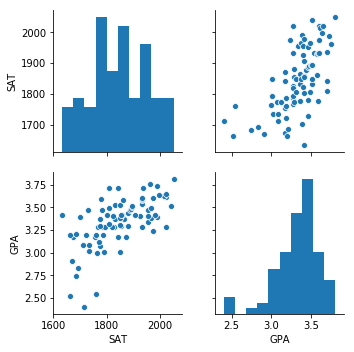

In [4]:
import seaborn as sns
sns.pairplot(df.iloc[:,:])

In [6]:
import statsmodels.formula.api as smf
df1 = smf.ols("SAT ~ GPA", data = df).fit()
df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           7.20e-11
Time:                        19:44:16   Log-Likelihood:                -487.37
No. Observations:                  84   AIC:                             978.7
Df Residuals:                      82   BIC:                             983.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1028.6407    109.438      9.399      0.000     810.933    1246.348
GPA          245.2176     32.755      7.487      0.000     180.058     310.377
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.455
Skew:                          -0.179   Prob(JB):                        0.796
Kurtosis:                       2.949   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
X= df.iloc[:,:-1]
X

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
5,1670
6,1764
7,1764
8,1792
9,1850


In [8]:
y = df.iloc[:,1]
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
5     2.91
6     3.00
7     3.00
8     3.01
9     3.01
10    3.02
11    3.07
12    3.08
13    3.08
14    3.12
15    3.17
16    3.17
17    3.17
18    3.17
19    3.19
20    3.19
21    3.19
22    3.20
23    3.21
24    3.24
25    3.28
26    3.28
27    3.28
28    3.28
29    3.28
      ... 
54    3.44
55    3.47
56    3.47
57    3.47
58    3.47
59    3.48
60    3.49
61    3.49
62    3.50
63    3.51
64    3.51
65    3.52
66    3.52
67    3.54
68    3.58
69    3.58
70    3.59
71    3.59
72    3.60
73    3.60
74    3.61
75    3.62
76    3.64
77    3.65
78    3.71
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [47]:
log_df1 = smf.ols("SAT ~ np.log(GPA)", data=df).fit()
log_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     52.40
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           2.20e-10
Time:                        20:21:14   Log-Likelihood:                -488.49
No. Observations:                  84   AIC:                             981.0
Df Residuals:                      82   BIC:                             985.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     938.6972    125.555      7.476      0.000     688.928    1188.467
np.log(GPA)   755.7932    104.406      7.239      0.000     548.097     963.489
==============================================================================
Omnibus:                        0.437   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.461
Skew:                          -0.165   Prob(JB):                        0.794
Kurtosis:                       2.850   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58, 1)
(26, 1)
(58,)
(26,)


In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
regressor.coef_

0.16251091768368786


array([0.00170771])

In [50]:
y_pred = regressor.predict(X_test)
y_pred

array([3.18345349, 3.34739384, 3.06903678, 3.23980798, 3.00243601,
       3.37130181, 3.16808408, 3.11685272, 3.2141923 , 3.22273086,
       3.46010284, 3.0861139 , 3.32177816, 3.61208921, 3.15954552,
       3.27225451, 3.60355065, 3.46522597, 3.33373215, 3.61379692,
       3.66332057, 3.25005426, 3.32177816, 3.64795116, 3.38496351,
       3.44985656])

In [51]:
y_pred == y_test

30    False
40    False
43    False
50    False
22    False
54    False
2     False
56    False
26    False
8     False
69    False
13    False
66    False
77    False
16    False
27    False
75    False
73    False
48    False
74    False
83    False
61    False
41    False
63    False
55    False
45    False
Name: GPA, dtype: bool

In [52]:
np.mean(y_pred)

3.3300539970632204

In [57]:
np.mean(y_test)

3.3834615384615385

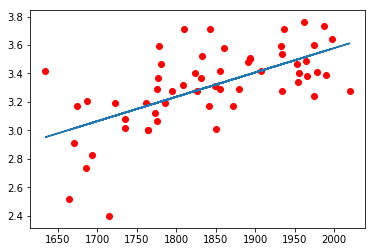

In [58]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train))
plt.show()